<a href="https://colab.research.google.com/github/dhruvmittal41/Task_4--Logistic-Regression/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve

In [2]:
df=pd.read_csv('/content/data.csv')
print(df.head())
df.describe()
df.isnull().sum()

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


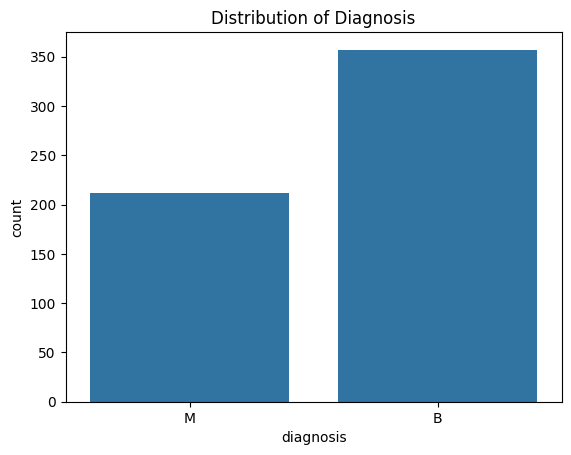

In [3]:

#distribution of target variable
sns.countplot(x='diagnosis',data=df)
plt.title('Distribution of Diagnosis')
plt.show()

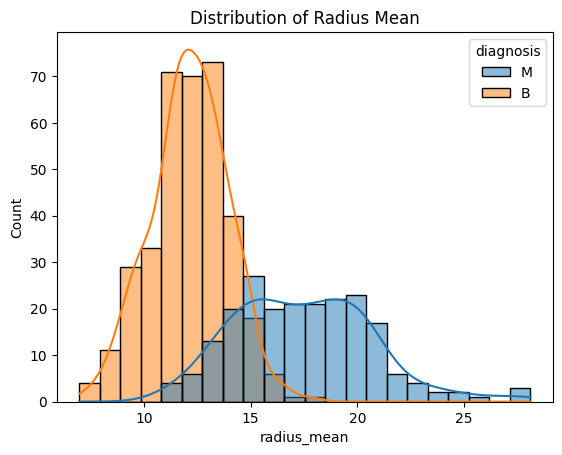

In [4]:

#distribution of radius_mean by diagnosis
sns.histplot(x='radius_mean',data=df,hue='diagnosis',kde=True)
plt.title('Distribution of Radius Mean')
plt.show()

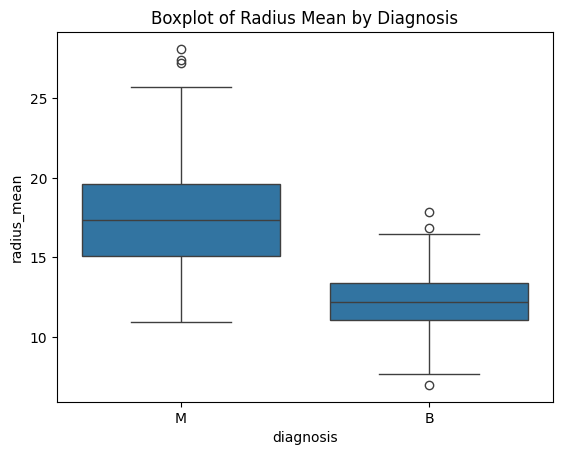

In [5]:

sns.boxplot(x='diagnosis',y='radius_mean',data=df)
plt.title('Boxplot of Radius Mean by Diagnosis')
plt.show()

In [6]:
#encode categorical value
label_encoders={}
for column in ['diagnosis']:
  le=LabelEncoder()
  df[column]=le.fit_transform(df[column])
  label_encoders[column]=le

  print(df.head())

#features and target
x=df.drop(['diagnosis','Unnamed: 32','radius_mean'],axis=1)
y=df['diagnosis']
x.head()

         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoo

,id,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:

#split data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
#feature scaling
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#logistic regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
logreg_pred=logreg.predict(X_test)
logreg_accuracy=accuracy_score(y_test,logreg_pred)

In [8]:

#display accuracy and performance metrices
print(f'Logistic Regression Accuracy:{logreg_accuracy*100:.2f}')
print('\nLogistic Regression Confusion Matrix:')
print(confusion_matrix(y_test,logreg_pred))
print('\nLogistic Regression Classification Report:')
print(classification_report(y_test,logreg_pred))

Logistic Regression Accuracy:96.49

Logistic Regression Confusion Matrix:
[[65  2]
 [ 2 45]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



ROC-AUC Score: 0.9637980311209908


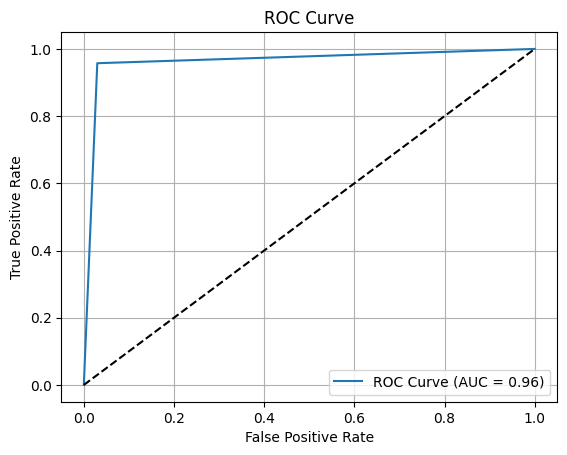

In [9]:
# ROC-AUC
auc = roc_auc_score(y_test,logreg_pred)
print("ROC-AUC Score:", auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, logreg_pred)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [10]:

# Custom threshold
threshold = 0.4
y_pred_custom = (logreg_pred >= threshold).astype(int)

# New Confusion Matrix and Report
print("Confusion Matrix (Threshold = 0.4):\n", confusion_matrix(y_test, y_pred_custom))
print("\nClassification Report:\n", classification_report(y_test, y_pred_custom))

Confusion Matrix (Threshold = 0.4):
 [[65  2]
 [ 2 45]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

